Import Data

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [8]:
!ls

data.csv  sample_data


In [13]:
data = pd.read_csv('/content/data-2.csv')
data.head()
#Age: 나이
#Experience: 경력
#Income: 수입
#Family: 가족단위
#CCAvg: 월 카드 사용량

,Age,Experience,Income,Family,CCAvg
0,25,1,49,4,1.6
1,45,19,34,3,1.5
2,39,15,11,1,1.0
3,35,9,100,1,2.7
4,35,8,45,4,1.0


In [14]:
#결측치 확인(없음)
data.isnull().sum()

Age           0
Experience    0
Income        0
Family        0
CCAvg         0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         2500 non-null   int64  
 1   Experience  2500 non-null   int64  
 2   Income      2500 non-null   int64  
 3   Family      2500 non-null   int64  
 4   CCAvg       2500 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 97.8 KB


In [16]:
y = data['Income']
X = data.drop(['Income'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1000)

Linear Regression

In [17]:
reg = LinearRegression()
results1 = reg.fit(x_train, y_train)

In [18]:
reg.coef_

array([-3.07793956,  2.89401562, -3.37220023, 16.09065086])

Ridge Regression

In [19]:
rreg = Ridge(alpha = 0) # alpha = Lambda
rreg.fit(x_train, y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [20]:
rreg.coef_

array([-3.07793956,  2.89401562, -3.37220023, 16.09065086])

In [21]:
alpha = np.logspace(-3,3,7)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [22]:
df = []
acc_table = []

for i, a in enumerate(alpha):
	rreg = Ridge(alpha=a).fit(x_train, y_train)
	df.append(pd.Series(np.hstack([rreg.intercept_, rreg.coef_])))
	pred_y = rreg.predict(x_test)

df_ridge = pd.DataFrame(df,index = alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
0,132.296084,132.295649,132.291303,132.247877,131.817002,127.823048,105.704966
1,-3.077937,-3.077919,-3.077732,-3.075864,-3.057321,-2.884607,-1.883048
2,2.894014,2.893995,2.893806,2.891920,2.873198,2.698718,1.681685
3,-3.372199,-3.372192,-3.372122,-3.371422,-3.364435,-3.295822,-2.731156
4,16.090648,16.090622,16.090363,16.087768,16.061871,15.807207,13.634454


Lasso Regression

In [23]:
lreg = Lasso(alpha = 0 ) # alpha = Lambda
lreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1105890.1320882076, tolerance: 373.8484091999999
  positive)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [24]:
lreg.coef_

array([-3.07790231,  2.8939786 , -3.37220244, 16.09065156])

In [25]:
df = []
acc_table = []

for i, a in enumerate(alpha):
	lreg = Lasso(alpha=a).fit(x_train, y_train)
	df.append(pd.Series(np.hstack([lreg.intercept_, lreg.coef_])))
	pred_y = lreg.predict(x_test)
    
df_lasso = pd.DataFrame(df,index = alpha).T
df_lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3094.3793768864125, tolerance: 373.8484091999999
  positive)


,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
0,132.261976,131.960877,128.945930,98.937749,54.569493,73.876,73.876
1,-3.076625,-3.065044,-2.949074,-1.794975,-0.134206,-0.000,-0.000
2,2.892703,2.881139,2.765340,1.612913,-0.000000,-0.000,-0.000
3,-3.371595,-3.366136,-3.311548,-2.765340,-0.000000,-0.000,-0.000
4,16.090400,16.088142,16.065558,15.839618,13.184919,0.000,0.000


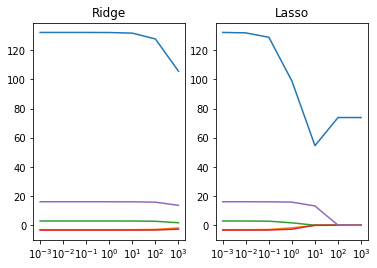

In [26]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")

plt.show()